In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [4]:
df = pd.read_csv('EDA_census.csv')
df.columns = df.columns.str.strip()

In [5]:
df.head()

,Table,State,Distt.,Area Name,Total,Age-group,Total.Persons,Total.Males,Total.Females,Illiterate.Persons,...,Edu.Certificate.Females,Edu.Diploma.Persons,Edu.Diploma.Males,Edu.Diploma.Females,Edu.Grad.Persons,Edu.Grad.Males,Edu.Grad.Females,Edu.Unclassified.Persons,Edu.Unclassified.Males,Edu.Unclassified.Females
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,345724,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,0,136465,75715,60750
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,0,96524,52561,43963
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,0,70452,38456,31996


In [27]:
data = df[ df['Age-group'].isin(['20-24'])]
data = data[data['Total'] == 'Total']
data = data[data['Area Name'] == 'INDIA']
data.head()

,Table,State,Distt.,Area Name,Total,Age-group,Total.Persons,Total.Males,Total.Females,Illiterate.Persons,...,Edu.Certificate.Females,Edu.Diploma.Persons,Edu.Diploma.Males,Edu.Diploma.Females,Edu.Grad.Persons,Edu.Grad.Males,Edu.Grad.Females,Edu.Unclassified.Persons,Edu.Unclassified.Males,Edu.Unclassified.Females
15,C2308,0,0,INDIA,Total,20-24,111424222,57584693,53839529,18679492,...,76240,1888379,1322758,565621,13170028,7029489,6140539,283366,156685,126681


In [29]:
100*data['Illiterate.Females']/data['Total.Females']

15    22.683085
dtype: float64

In [42]:
data1=df.groupby('Age-group')[['Literate.Persons','Total.Persons']].sum()
data1.head()

,Literate.Persons,Total.Persons
Age-group,,
0-6,0,658061012
10,108390408,122208428
11,91009892,98963784
12,101943112,111509228
13,89880828,97122732


In [43]:
data1['Literacy_Perc'] = data1['Literate.Persons']/data1['Total.Persons'] *100
data1

,Literate.Persons,Total.Persons,Literacy_Perc
Age-group,,,
0-6,0,658061012,0.000000
10,108390408,122208428,88.693071
11,91009892,98963784,91.962826
12,101943112,111509228,91.421234
13,89880828,97122732,92.543554
14,92629536,101032676,91.682750
15,93197988,103597816,89.961344
16,88319224,98369172,89.783437
17,76716048,84869868,90.392562


In [48]:
data1.reset_index(inplace=True)

In [58]:
data1[['Age-group','Literacy_Perc']]

,Age-group,Literacy_Perc
0,0-6,0.000000
1,10,88.693071
2,11,91.962826
3,12,91.421234
4,13,92.543554
5,14,91.682750
6,15,89.961344
7,16,89.783437
8,17,90.392562
9,18,86.665872


In [63]:
data3=df.groupby('Area Name')['Total.Females','Literate.Females'].sum()
data3['Literacy_percentage'] = 100*data3['Literate.Females']/data3['Total.Females']

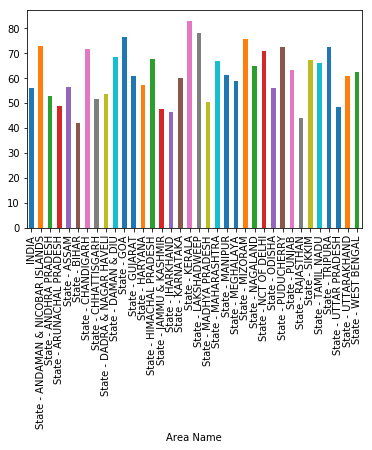

In [67]:
data3['Literacy_percentage'].plot.bar()

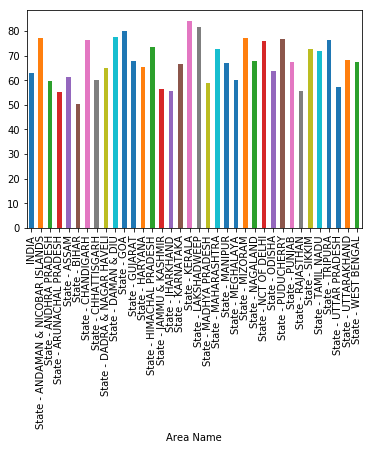

In [70]:
data4=df.groupby('Area Name')['Total.Persons','Literate.Persons'].sum()
data4['Literacy_percentage'] = 100*data4['Literate.Persons']/data4['Total.Persons']
data4['Literacy_percentage'].plot.bar()

In [71]:
data4

,Total.Persons,Literate.Persons,Literacy_percentage
Area Name,,,
INDIA,4843419908,3054555248,63.066084
State - ANDAMAN & NICOBAR ISLANDS,1522324,1177124,77.324144
State - ANDHRA PRADESH,338323108,202227040,59.773345
State - ARUNACHAL PRADESH,5534908,3064020,55.358102
State - ASSAM,124822304,76711908,61.456892
State - BIHAR,416397808,210018212,50.436916
State - CHANDIGARH,4221800,3221752,76.312284
State - CHHATTISGARH,102180792,61519688,60.206705
State - DADRA & NAGAR HAVELI,1374836,892920,64.947383
